In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

--2025-02-28 15:43:31--  https://github.com/jordipereiragude/dataforcourses/raw/main/ejemplo1Pronosticos.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/main/ejemplo1Pronosticos.xlsx [following]
--2025-02-28 15:43:31--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/main/ejemplo1Pronosticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9105 (8.9K) [application/octet-stream]
Saving to: ‘ejemplo1Pronosticos.xlsx’

ejemplo1Pronosticos 100%[===================>]   8.89K  --.-KB/s    in 0s      

2025-02-28 15:43:32 (54.1 MB/s) - ‘ejemp

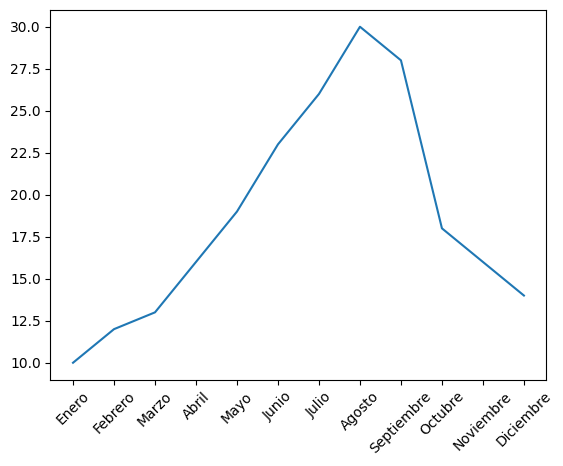

In [ ]:
!wget 'https://github.com/jordipereiragude/dataforcourses/raw/main/ejemplo1Pronosticos.xlsx'

df = pd.read_excel("ejemplo1Pronosticos.xlsx")
print(df.head())
plt.plot(df['Mes'], df['Ventas'], linestyle='-')
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Mes'],
                         y=df['Ventas'],
                         mode='lines+markers',
                         name='Ventas'))
fig.update_layout(title='Ventas a lo largo del último año',
                  xaxis_title='Mes',
                  yaxis_title='Ventas')
pio.show(fig)

- bad graphic
- patron de estacionalidad
- un punto por anyo
- minimo tendriamos 2 por anyo
- minimo 4 anyos

In [ ]:
df.loc[len(df)] = ['', float('NaN')] # generar una nueva columna vacia
df['forecast-3'] = pd.Series([float('NaN')] * len(df))
for i in range(3, len(df)): # el 3 se debe a los periodos que pierdo por la media movil
    df.loc[i, 'forecast-3'] = df.loc[i-3:i-1, 'Ventas'].mean()
print(df)

           Mes  Ventas  forecast-3
0        Enero    10.0         NaN
1      Febrero    12.0         NaN
2        Marzo    13.0         NaN
3        Abril    16.0   11.666667
4         Mayo    19.0   13.666667
5        Junio    23.0   16.000000
6        Julio    26.0   19.333333
7       Agosto    30.0   22.666667
8   Septiembre    28.0   26.333333
9      Octubre    18.0   28.000000
10   Noviembre    16.0   25.333333
11   Diciembre    14.0   20.666667
12                 NaN   16.000000


In [ ]:
ventas_trace = go.Scatter(x=df['Mes'], y=df['Ventas'], mode='lines+markers', name='Ventas')
forecast_trace = go.Scatter(x=df['Mes'],y=df['forecast-3'],mode='lines+markers',name='MA3')
#forecast_trace = go.Scatter(x=df['Mes'], y=df['forecast-3'].where(df['forecast-3'].notnull()), mode='lines', name='Forecast-3')
fig = go.Figure([ventas_trace, forecast_trace])
fig.update_layout(title='Ventas y MA(3)',
                  xaxis_title='Mes',
                  yaxis_title='Value')
pio.show(fig)

In [ ]:
valid_df = df.dropna(subset=['Ventas', 'forecast-3'])
absolute_deviations = np.abs(valid_df['Ventas'] - valid_df['forecast-3'])
mad = absolute_deviations.mean()
print("Mean Absolute Deviation (MAD):", mad)

Mean Absolute Deviation (MAD): 6.481481481481483


Todos los metodos k usan media movil van retrasados. Estos métodos tienden a ser reactivos y pueden no capturar cambios en las tendencias de manera oportuna. `El follower sigue al leader`. Si siempre usa el pasado va a ver un retraso.